In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 加载数据
data = pd.read_csv('../balanced_train_data.csv')
# 分离特征和目标变量
X = data.drop(columns=['churn'])
y = data['churn']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
#设置中文字体
plt.rcParams['axes.unicode_minus'] = False
#设置负号显示
# 定义模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
# 模型评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred_proba)
    }
# 初步训练和评估
initial_results = {}
for name, model in models.items():
    initial_results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
# 转换为 DataFrame
import pandas as pd
initial_results_df = pd.DataFrame(initial_results).T
print("初步模型性能:\n", initial_results_df)


初步模型性能:
                         Accuracy  F1 Score       AUC
Logistic Regression     0.786569  0.802553  0.861036
Random Forest           0.821527  0.827402  0.894197
Decision Tree           0.764489  0.766636  0.764264
Naive Bayes             0.736431  0.775558  0.827539
Support Vector Machine  0.630635  0.604239  0.714364
XGBoost                 0.822447  0.832320  0.894832


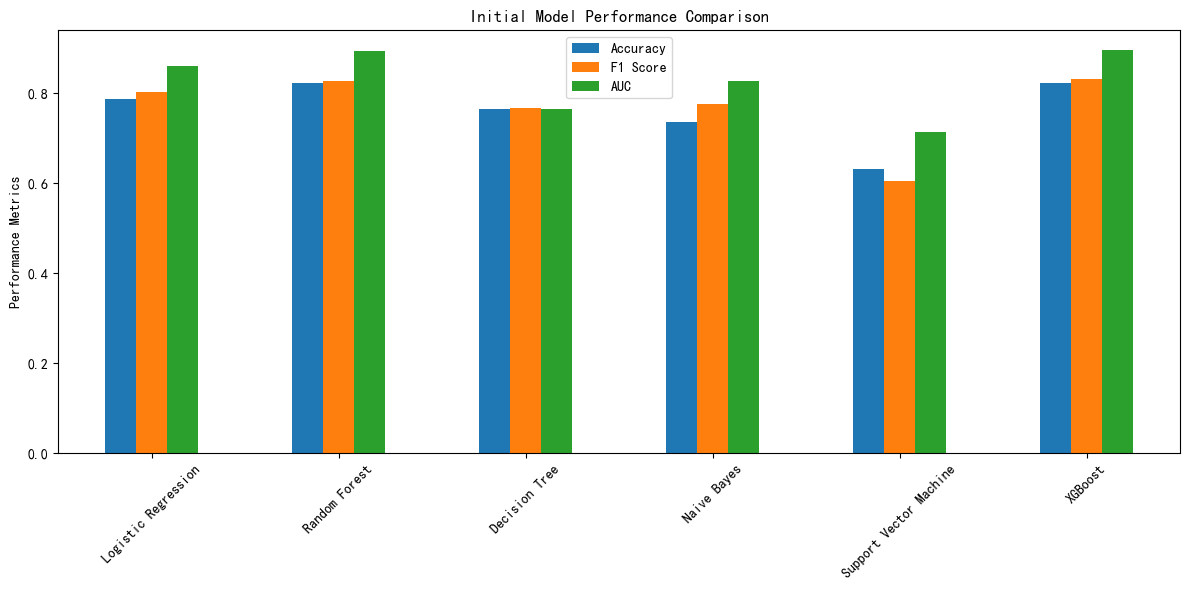

In [3]:
import matplotlib.pyplot as plt

# 绘制性能柱状图
initial_results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Initial Model Performance Comparison')
plt.ylabel('Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('initial_model_performance.png')
plt.show()


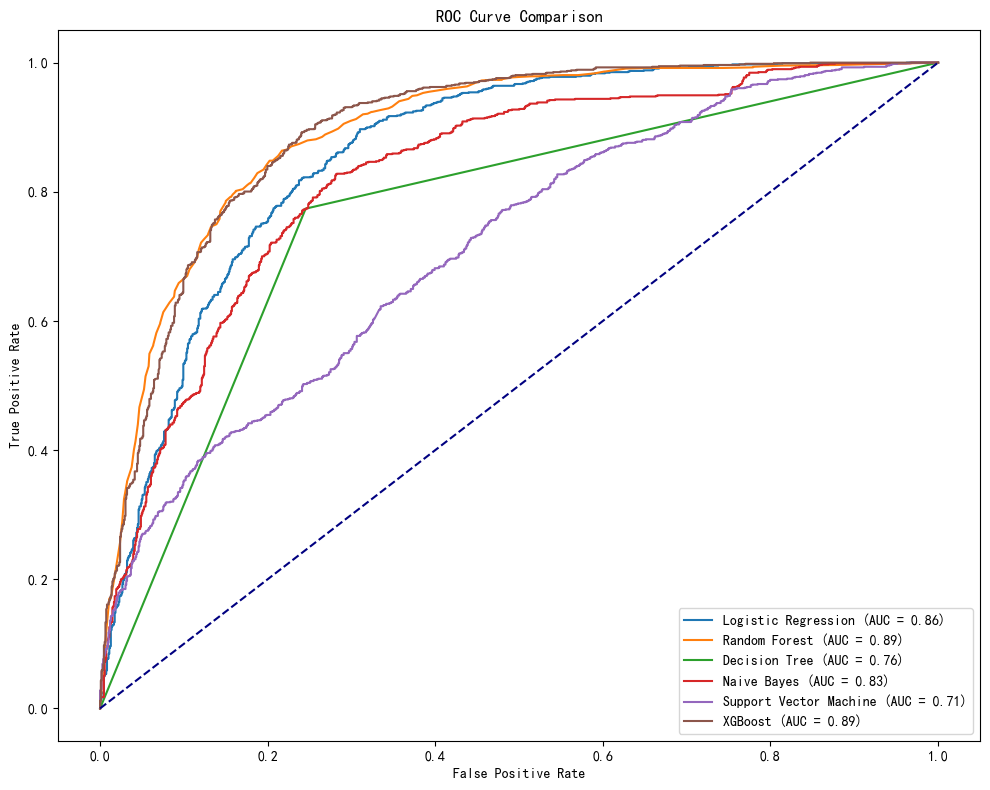

In [4]:
from sklearn.metrics import roc_curve, auc

# 绘制多个模型的 ROC 曲线
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curve_comparison.png')
plt.show()
